# Housing project on indore using linear regression estimate the price


## Importing libraries 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as py
import seaborn as sns 
%matplotlib inline 
import sklearn as sk

About the Data 
1.	CRIM: per capita crime rate 
2.	ZN: the proportion of residential land zoned for lots larger than 25,000 sq.ft.
3.	INDUS: the proportion of non-retail business acres per town.
4.	RIVER_FLG: River Dummy Var (this is equal to 1 if tract bounds river; 0 otherwise)
5.	nitric oxides concentration: the nitric oxides concentration (parts per 10 million)
6.	#rooms/dwelling: the average number of rooms per dwelling
7.	AGE: the proportion of owner-occupied units built prior to 1940
8.	DIS: the weighted distances to five employment centers of the town
9.	RAD: the index of accessibility to radial highways
10.	TAX: the full-value property-tax rate per INR 10 millions (1 crores)
11.	PTRATIO: the pupil-teacher ratio by area
12.	B: calculated as 1000(Bk — 0.63)², where Bk is the proportion of people living is slums in the area
13.	LSTAT: This is the percentage lower status and income of the population
14.	MEDV: This is the median value of owner-occupied homes in INR millions (10 lakhs)

# Load Data 

In [3]:
#loading train data 
train = pd.read_csv("IndoreHP_Train.csv")

In [4]:
train.head(2)

,ID,CRIM,ZN,INDUS,RIVER_FLG,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.006130,18.0,2.3562,0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.838,4.8804,24.72
1,2,0.027037,0.0,6.8579,0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.745,9.4142,22.68


In [5]:
train.describe()

,ID,CRIM,ZN,INDUS,RIVER_FLG,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,175.500000,0.404963,15.257143,8.436498,0.077143,0.510684,6.396922,60.867446,4.402082,4.482857,310.274286,17.702000,379.876775,10.421892,25.129723
std,101.180532,0.651082,25.607566,6.044201,0.267200,0.103476,0.719591,28.566625,1.971886,1.607109,67.661548,2.198807,41.982531,5.915906,8.617897
min,1.000000,0.006130,0.000000,0.450800,0.000000,0.374300,4.728960,2.871000,1.255520,1.000000,188.000000,12.600000,69.384000,1.799200,12.319000
25%,88.250000,0.058786,0.000000,4.019625,0.000000,0.441527,5.931550,35.149500,2.723105,4.000000,264.000000,16.100000,375.525275,6.109200,19.692750
50%,175.500000,0.132758,0.000000,6.448000,0.000000,0.489425,6.276270,62.019500,4.108295,4.000000,304.000000,17.900000,387.009300,9.393150,22.728500
75%,262.750000,0.411469,22.000000,10.263600,0.000000,0.542917,6.746752,88.151000,5.750662,5.000000,358.000000,19.100000,400.156950,13.245100,28.523250
max,350.000000,4.261296,100.000000,26.676000,1.000000,0.914550,8.986750,105.000000,9.555104,8.000000,469.000000,21.200000,416.745000,33.033600,52.500000


In [6]:
train.rename({"nitric oxides concentration":"No2","#rooms/dwelling":"Rooms" , "B":"prop_slums"}, axis=1,inplace=True)

In [7]:
#loading test data 
test = pd.read_csv("IndoreHP_Test.csv")

In [8]:
test.head(2)

,ID,CRIM,ZN,INDUS,RIVER_FLG,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,400,9.693915,0,18.824,0,0.63731,6.02952,100.0,1.204173,24,666,20.2,347.8425,10.0065
1,401,5.143131,0,18.462,0,0.63731,4.97000,100.0,1.305850,24,666,20.2,356.7440,3.0970


In [10]:
train.describe()

,ID,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,175.500000,0.404963,15.257143,8.436498,0.077143,0.510684,6.396922,60.867446,4.402082,4.482857,310.274286,17.702000,379.876775,10.421892,25.129723
std,101.180532,0.651082,25.607566,6.044201,0.267200,0.103476,0.719591,28.566625,1.971886,1.607109,67.661548,2.198807,41.982531,5.915906,8.617897
min,1.000000,0.006130,0.000000,0.450800,0.000000,0.374300,4.728960,2.871000,1.255520,1.000000,188.000000,12.600000,69.384000,1.799200,12.319000
25%,88.250000,0.058786,0.000000,4.019625,0.000000,0.441527,5.931550,35.149500,2.723105,4.000000,264.000000,16.100000,375.525275,6.109200,19.692750
50%,175.500000,0.132758,0.000000,6.448000,0.000000,0.489425,6.276270,62.019500,4.108295,4.000000,304.000000,17.900000,387.009300,9.393150,22.728500
75%,262.750000,0.411469,22.000000,10.263600,0.000000,0.542917,6.746752,88.151000,5.750662,5.000000,358.000000,19.100000,400.156950,13.245100,28.523250
max,350.000000,4.261296,100.000000,26.676000,1.000000,0.914550,8.986750,105.000000,9.555104,8.000000,469.000000,21.200000,416.745000,33.033600,52.500000


In [12]:
train.isnull().sum()

ID            0
CRIM          0
ZN            0
INDUS         0
RIVER_FLG     0
No2           0
Rooms         0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
prop_slums    0
LSTAT         0
MEDV          0
dtype: int64

In [19]:
train.dtypes

ID              int64
CRIM          float64
ZN            float64
INDUS         float64
RIVER_FLG       int64
No2           float64
Rooms         float64
AGE           float64
DIS           float64
RAD             int64
TAX             int64
PTRATIO       float64
prop_slums    float64
LSTAT         float64
MEDV          float64
dtype: object

###  Result : NO NULL values 

###  Start EDA

<AxesSubplot:>

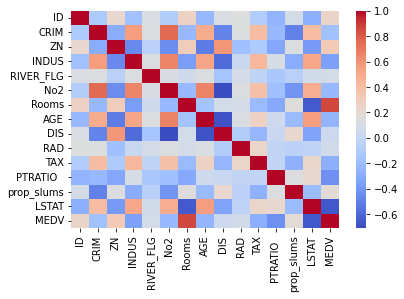

In [16]:
sns.heatmap(train_corr,cmap='coolwarm')

,ID,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV
161,162,1.463360,0.0,19.7758,0,0.58685,7.33922,93.524,1.872355,5,403,14.7,385.6629,1.7992,51.0
162,163,1.888783,0.0,18.9926,1,0.58685,7.48992,94.272,2.101921,5,403,14.7,385.7139,2.0160,52.0
163,164,1.503830,0.0,19.3842,1,0.62315,8.71000,92.961,2.118760,5,403,14.7,388.4500,3.1872,52.5
166,167,1.949884,0.0,19.9716,0,0.62920,7.77042,92.352,2.025441,5,403,14.7,376.6860,3.6630,50.5


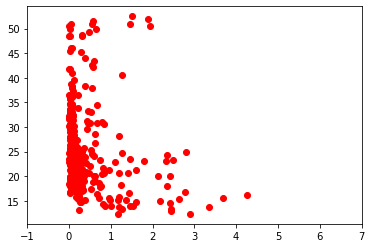

In [23]:

py.xlim(-1,7)
py.scatter(x='CRIM',y='MEDV',data=train,marker='o',cmap='spring',color='r')
train[(train['MEDV']>50) & (train['CRIM'] > 1)]


### 

In [19]:
df[df['CRIM']<=1]['CRIM']

0      0.006130
1      0.027037
2      0.028109
3      0.033341
4      0.072502
         ...   
65     0.152369
79     0.111027
92     0.045040
99     0.199162
100    0.179703
Name: CRIM, Length: 332, dtype: float64

### First Observation :  As the criminal rate increases,the price of the house decreases .if the vaue of crime rate stays < 1  the price of the house increases. 

In [20]:
a = train[train['ZN']== 0]
a.describe()

,ID,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV
count,222.000000,222.000000,222.0,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,159.936937,0.561177,0.0,10.660786,0.090090,0.542403,6.247297,70.673234,3.532758,4.463964,320.432432,18.306306,374.781779,11.971251,23.151405
std,97.005880,0.764091,0.0,6.383142,0.286958,0.107093,0.685032,26.048264,1.392117,1.444621,73.474978,2.019398,50.646924,6.187883,8.082225
min,2.000000,0.024231,0.0,1.795500,0.000000,0.396480,4.728960,2.871000,1.255520,1.000000,188.000000,14.700000,69.384000,1.799200,12.319000
25%,90.250000,0.090429,0.0,6.200000,0.000000,0.479220,5.865373,54.186500,2.424476,4.000000,277.000000,17.400000,372.867875,7.459400,18.629000
50%,148.500000,0.222132,0.0,8.431600,0.000000,0.519825,6.134470,78.389500,3.436584,4.000000,307.000000,18.400000,387.056650,10.989000,21.298000
75%,221.750000,0.633143,0.0,14.279625,0.000000,0.560830,6.499380,92.994000,4.520571,5.000000,403.000000,20.050000,400.156950,15.181350,24.862500
max,347.000000,4.261296,0.0,26.676000,1.000000,0.914550,8.986750,105.000000,8.254008,8.000000,437.000000,21.200000,416.745000,33.033600,52.500000


### Third observation :  ZN = 0 , for most of the cases and moreover the MEDV max is 50 

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RIVER_FLG', ylabel='count'>

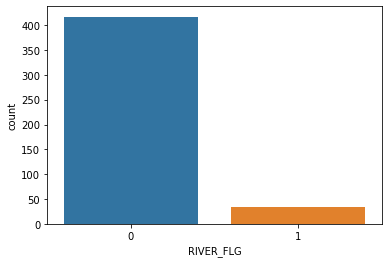

In [21]:
sns.countplot('RIVER_FLG',data= df)

### fourth obs : max number of houses bought didnt have river pass , as price increase if latter is the case 

In [22]:
train.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'RIVER_FLG', 'No2', 'Rooms', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO  ', 'prop_slums', 'LSTAT', 'MEDV'],
      dtype='object')

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='No2', ylabel='Density'>

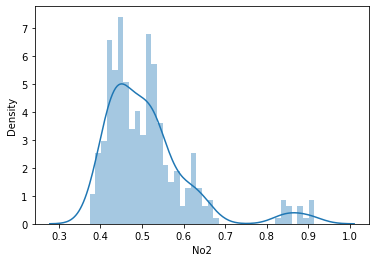

In [23]:
sns.distplot(train['No2'],bins=40,)

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


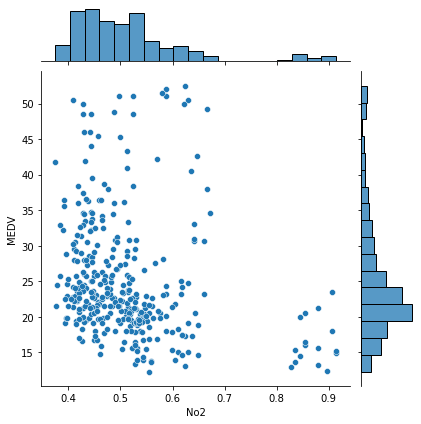

In [24]:
sns.jointplot('No2','MEDV',data=train)

### Fifth Observation:  the value of No2 should be below 0.65 to get better price of the house 

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    350.000000
mean      60.867446
std       28.566625
min        2.871000
25%       35.149500
50%       62.019500
75%       88.151000
max      105.000000
Name: AGE, dtype: float64

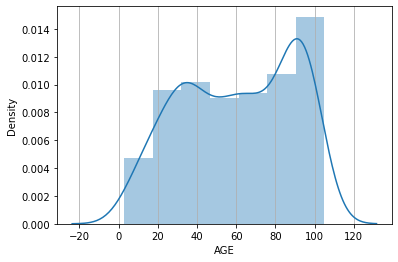

In [25]:
py.grid(visible=True , axis = 'x')
sns.distplot(train['AGE'])
train['AGE'].describe()


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

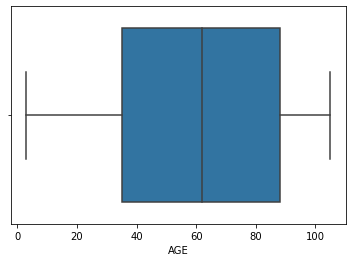

In [26]:
sns.boxplot('AGE',data=train)

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


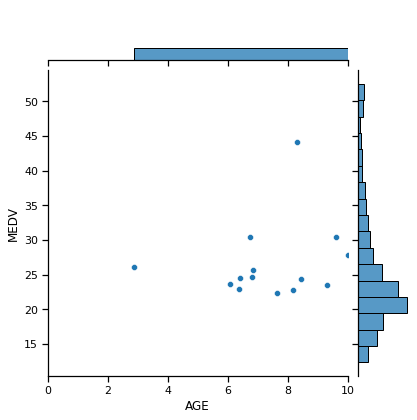

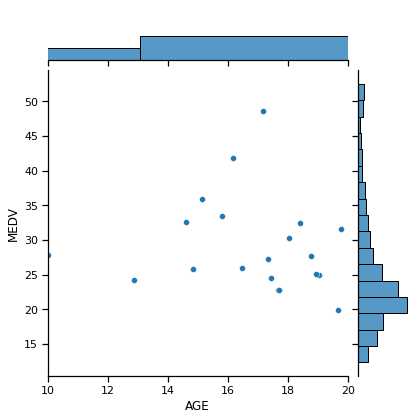

In [28]:
sns.set_context("notebook")
sns.jointplot('AGE','MEDV',data=train,xlim=(0,10),ax=[0,1])
sns.jointplot('AGE','MEDV',data=train,xlim=(10,20),ax=[2,1])



###  sixth observation : as the age proportion increases the value of MEDV is less. hence lesser the value of Age more the value of medv

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

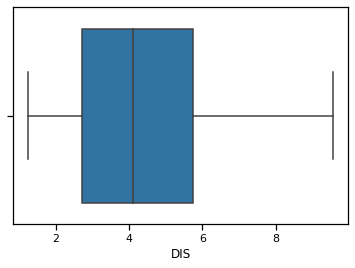

In [30]:
train['DIS'].describe()
sns.boxplot('DIS',data=train)

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


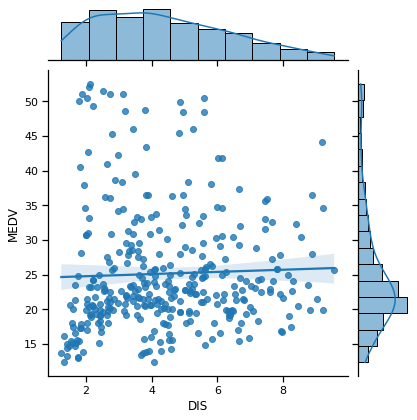

In [31]:
sns.jointplot('DIS','MEDV',data=train,kind='reg')

### Observation : The value of DIS has most of the time has no effect on MEDV 

In [34]:
train['RAD'].nunique()
train['RAD'].value_counts()


5    114
4    101
3     38
2     24
8     24
6     18
7     17
1     14
Name: RAD, dtype: int64

In [35]:
train[train['RAD'] == 1].describe()

,ID,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000
mean,267.357143,0.023716,54.142857,2.918900,0.071429,0.429268,6.577640,32.072714,7.069486,1.0,294.928571,16.185714,382.875207,7.326050,26.089357
std,91.893423,0.013977,27.988616,1.650738,0.267261,0.041141,0.762261,16.059155,1.509601,0.0,50.431163,1.462273,19.167398,2.931045,8.847427
min,1.000000,0.006130,0.000000,1.234200,0.000000,0.376320,5.420700,9.603000,4.090000,1.0,198.000000,13.600000,347.760000,3.033600,16.500000
25%,255.250000,0.013283,35.000000,1.729275,0.000000,0.399840,6.067380,20.761500,6.152938,1.0,269.750000,15.350000,374.988750,5.261550,19.866000
50%,285.500000,0.020552,57.500000,2.584500,0.000000,0.414515,6.575000,29.778500,6.696556,1.0,298.000000,15.750000,380.479900,6.912000,23.800000
75%,332.750000,0.033688,80.000000,3.363300,0.000000,0.445493,6.937800,33.210000,8.512291,1.0,312.250000,16.775000,397.203150,8.541850,30.424500
max,350.000000,0.049225,90.000000,6.363000,1.000000,0.516480,8.239920,64.548000,9.220300,1.0,422.000000,19.700000,410.508800,12.802900,50.500000


In [36]:
train['RAD'].nunique()

8

<AxesSubplot:xlabel='RAD', ylabel='count'>

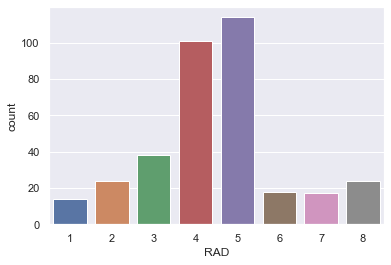

In [39]:
sns.set_theme()
sns.countplot(x='RAD',data=train)

In [40]:
train[train['RAD']==4].describe()

,ID,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000
mean,159.841584,0.419527,13.272277,10.252268,0.079208,0.501795,6.149862,60.914020,4.304161,4.0,315.970297,19.048515,384.776113,12.008470,21.881079
std,112.352279,0.473345,25.955397,5.638585,0.271410,0.071190,0.541670,30.726059,1.480477,0.0,61.355922,1.833664,30.328289,6.253727,6.855344
min,14.000000,0.013810,0.000000,0.450800,0.000000,0.378100,4.774080,6.386000,1.482582,4.0,224.000000,14.400000,244.230000,2.764800,12.319000
25%,54.000000,0.067912,0.000000,6.312800,0.000000,0.441370,5.858650,31.654000,3.644640,4.0,277.000000,18.200000,377.055000,7.333800,17.480000
50%,136.000000,0.251990,0.000000,8.547000,0.000000,0.498780,6.136220,62.055000,4.224627,4.0,304.000000,18.900000,388.604700,11.087400,20.790000
75%,279.000000,0.633664,21.000000,11.119500,0.000000,0.548760,6.430050,91.200000,5.130665,4.0,307.000000,21.000000,404.348400,16.406500,23.800000
max,349.000000,2.767254,95.000000,22.984500,1.000000,0.648960,8.111250,103.000000,8.761200,4.0,437.000000,21.200000,416.745000,33.033600,49.955000


### RAD equals to 4 and 5 are preferred

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAX', ylabel='Density'>

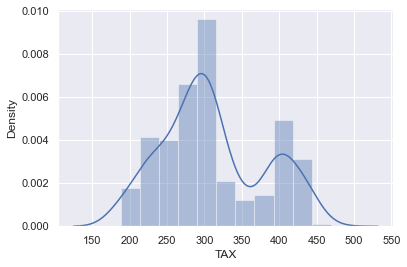

In [41]:
sns.distplot(train['TAX'])

In [42]:
train.rename({"PTRATIO  ":"PTRATIO"}, axis=1,inplace=True)

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


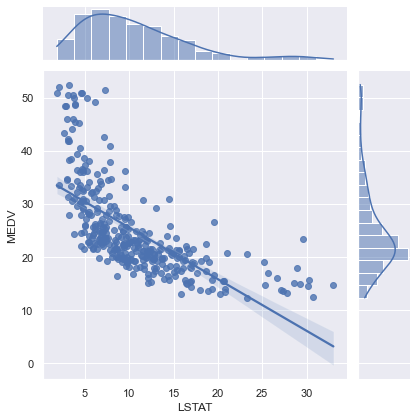

In [44]:
sns.jointplot('LSTAT','MEDV',train,kind='reg')

### the value of house decreased as the LSTAT increases.

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TAX', ylabel='count'>

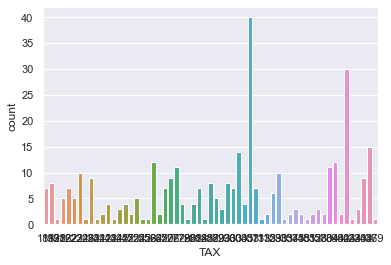

In [45]:
sns.countplot(train['TAX'])

### Feature Engineering 

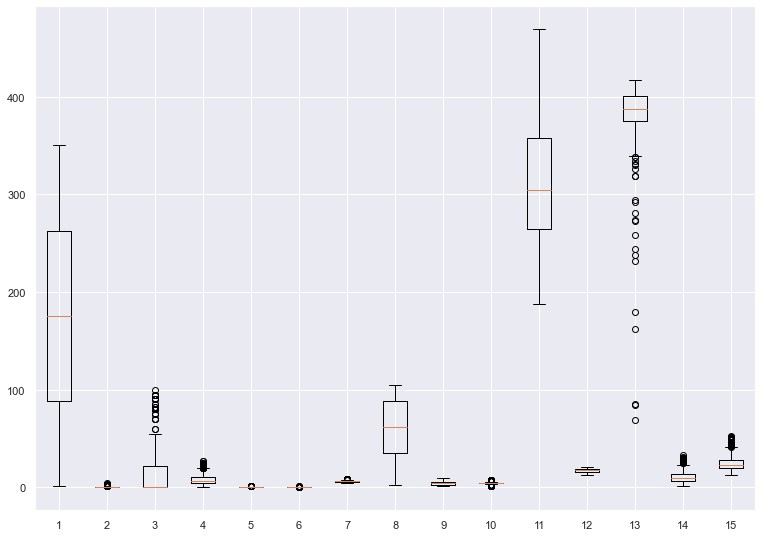

In [46]:
sns.set_context('notebook')
fig = py.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(train)

### Pre- processing 

In [47]:
df.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'RIVER_FLG', 'No2', 'Rooms', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO  ', 'prop_slums', 'LSTAT', 'MEDV',
       'nitric oxides concentration', '#rooms/dwelling', 'B'],
      dtype='object')

In [48]:
df.drop('ID',axis=1,inplace=True)

In [49]:
df.head(2)

,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV,nitric oxides concentration,#rooms/dwelling,B
0,0.006130,18.0,2.3562,0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.838,4.8804,24.72,NaN,NaN,NaN
1,0.027037,0.0,6.8579,0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.745,9.4142,22.68,NaN,NaN,NaN


<AxesSubplot:xlabel='CRIM'>

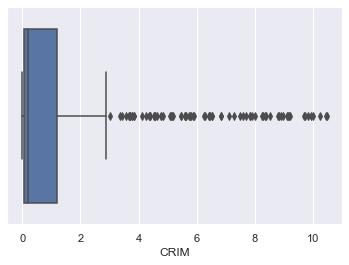

In [50]:
sns.boxplot(x='CRIM',data= df)

In [51]:
df['CRIM'].describe()

count    452.000000
mean       1.426488
std        2.511543
min        0.006130
25%        0.071068
50%        0.190949
75%        1.209426
max       10.464867
Name: CRIM, dtype: float64

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM', ylabel='Density'>

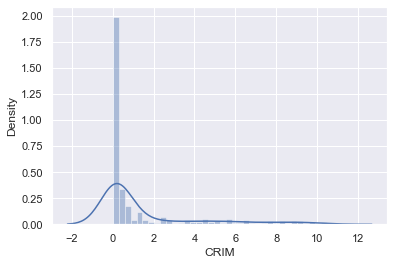

In [52]:
sns.distplot(df['CRIM'],kde=True)

In [53]:
lowerlimit_crim = df['CRIM'].quantile(0.05)
lowerlimit_crim


0.02642823

In [54]:
upperlimit_crim = df['CRIM'].quantile(0.95)
upperlimit_crim

7.867665724999999

In [55]:
df[df['CRIM']<lowerlimit_crim]['CRIM'].count()

23

In [56]:
df[df['CRIM']>upperlimit_crim]['CRIM'].count()

23

In [57]:
df.head(2)

,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV,nitric oxides concentration,#rooms/dwelling,B
0,0.006130,18.0,2.3562,0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.838,4.8804,24.72,NaN,NaN,NaN
1,0.027037,0.0,6.8579,0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.745,9.4142,22.68,NaN,NaN,NaN


In [58]:
df['CRIM'].describe()

count    452.000000
mean       1.426488
std        2.511543
min        0.006130
25%        0.071068
50%        0.190949
75%        1.209426
max       10.464867
Name: CRIM, dtype: float64

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM', ylabel='Density'>

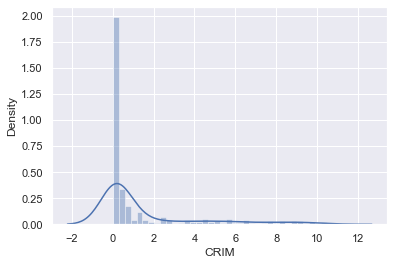

In [59]:
sns.distplot(df['CRIM'])

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

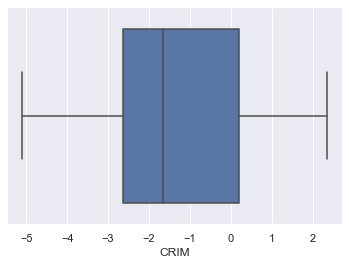

In [60]:
sns.boxplot(np.log(df['CRIM']))

In [61]:
df['CRIM']=np.log(df['CRIM'])

In [62]:
df.head(2)

,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV,nitric oxides concentration,#rooms/dwelling,B
0,-5.094495,18.0,2.3562,0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.838,4.8804,24.72,NaN,NaN,NaN
1,-3.610553,0.0,6.8579,0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.745,9.4142,22.68,NaN,NaN,NaN


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZN'>

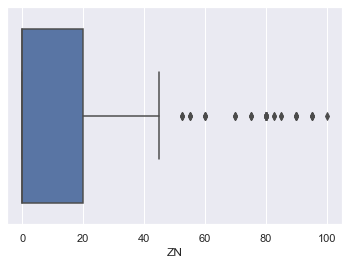

In [63]:
sns.boxplot(df['ZN'])

All observation from EDA:
1.	As the criminal rate increases, the price of the house decreases. if the value of crime rate stays < 1 the price of the house increases with each addition feature.
2.	ZN = 0, for most of the cases and moreover the MEDV max is 50
3.	max number of houses bought didn’t have river pass, as price increase if latter is the case
4.	the value of NO2 should be below 0.65 to get better price of the house
5.	as the age proportion increases the value of MEDV is less. hence lesser the value of Age more the value of MEDV
6.	the value of DIS has most of the time has no effect on MEDV
7.	RAD equals to 4 and 5 are preferred
8.	The value of house decreased as the LSTAT increases


DATA PRE-PROCESSING AND RANSFORMATION 

In [64]:
train.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'RIVER_FLG', 'No2', 'Rooms', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'prop_slums', 'LSTAT', 'MEDV'],
      dtype='object')

In [65]:
train.shape

(350, 15)

In [66]:
test.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'RIVER_FLG', 'nitric oxides concentration',
       '#rooms/dwelling', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO  ', 'B',
       'LSTAT'],
      dtype='object')

In [67]:
test.shape

(102, 14)

In [68]:
test.rename({"nitric oxides concentration" :"No2","PTRAION":"PTRATIO","#rooms/dwelling":"Rooms","B":"prop_slums" },axis=1,inplace=True)

In [69]:
test

,ID,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT
0,400,9.693915,0,18.8240,0,0.63731,6.02952,100.000,1.204173,24,666,20.2,347.8425,10.0065
1,401,5.143131,0,18.4620,0,0.63731,4.97000,100.000,1.305850,24,666,20.2,356.7440,3.0970
2,402,6.407985,0,17.5570,1,0.63100,7.01600,93.600,1.178352,24,666,20.2,380.2885,3.0192
3,403,8.267250,0,18.4620,1,0.67468,6.16875,93.184,1.107008,24,666,20.2,354.8376,9.3240
4,404,5.726680,0,17.9190,1,0.66255,6.95032,96.800,1.329566,24,666,20.2,364.0701,3.5808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,497,9.805834,0,18.4620,0,0.69937,6.69900,97.512,2.046928,24,666,20.2,57.6840,24.5616
98,498,7.288419,0,17.1950,0,0.72765,5.91941,100.878,1.584398,24,666,20.2,404.8930,19.9200
99,499,0.199162,0,28.8496,0,0.57855,4.99114,93.100,1.786148,4,711,20.1,327.9829,29.9768
100,500,0.179703,0,28.0174,0,0.63945,5.52228,94.368,1.720292,4,711,20.1,347.4905,25.1685


In [70]:
df= train.append(test)

C:\Users\shubh\AppData\Local\Temp\ipykernel_24152\1345815606.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= train.append(test)


In [71]:
df

,ID,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV,PTRATIO
0,1,0.006130,18.0,2.3562,0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.8380,4.8804,24.720,NaN
1,2,0.027037,0.0,6.8579,0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.7450,9.4142,22.680,NaN
2,3,0.028109,0.0,6.9286,0,0.45962,7.40055,61.711,4.967100,2,242,17.8,396.7583,4.0703,36.435,NaN
3,4,0.033341,0.0,2.2454,0,0.44426,7.34790,45.342,6.001578,3,222,18.7,406.4689,2.9400,34.736,NaN
4,5,0.072502,0.0,2.1800,0,0.47632,7.14700,53.658,5.819712,3,222,18.7,388.9620,5.3833,38.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,497,9.805834,0.0,18.4620,0,0.69937,6.69900,97.512,2.046928,24,666,NaN,57.6840,24.5616,NaN,20.2
98,498,7.288419,0.0,17.1950,0,0.72765,5.91941,100.878,1.584398,24,666,NaN,404.8930,19.9200,NaN,20.2
99,499,0.199162,0.0,28.8496,0,0.57855,4.99114,93.100,1.786148,4,711,NaN,327.9829,29.9768,NaN,20.1
100,500,0.179703,0.0,28.0174,0,0.63945,5.52228,94.368,1.720292,4,711,NaN,347.4905,25.1685,NaN,20.1


In [72]:
df.drop('ID',axis=1,inplace=True)

In [73]:
df.head(2)

,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV,PTRATIO
0,0.006130,18.0,2.3562,0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.838,4.8804,24.72,NaN
1,0.027037,0.0,6.8579,0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.745,9.4142,22.68,NaN


In [74]:
import plotly.express as px
px.box(np.log(df['CRIM']))
df['CRIM']=np.log(df['CRIM'])

In [75]:
df.head(2)


,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT,MEDV,PTRATIO
0,-5.094495,18.0,2.3562,0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.838,4.8804,24.72,NaN
1,-3.610553,0.0,6.8579,0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.745,9.4142,22.68,NaN


In [76]:
#Let’s treat the median_income column as the output (Y).
y= train.MEDV

In [77]:
y.shape

(350,)

In [78]:
#Simultaneously we will have to drop the column from dataset to form the input vector.

x=train.drop(['ID','MEDV'],axis=1)

In [79]:
x.head()

,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT
0,0.006130,18.0,2.3562,0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.8380,4.8804
1,0.027037,0.0,6.8579,0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.7450,9.4142
2,0.028109,0.0,6.9286,0,0.45962,7.40055,61.711,4.967100,2,242,17.8,396.7583,4.0703
3,0.033341,0.0,2.2454,0,0.44426,7.34790,45.342,6.001578,3,222,18.7,406.4689,2.9400
4,0.072502,0.0,2.1800,0,0.47632,7.14700,53.658,5.819712,3,222,18.7,388.9620,5.3833


## Modelling using SKlearn

In [80]:
#splitting the data into two parts
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.67,random_state=42)


In [81]:
print("shape of original dataset :", train.shape)
print("shape of input - training set", x_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - training set", y_train.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (350, 15)
shape of input - training set (234, 13)
shape of input - testing set (116, 13)
shape of output - training set (234,)
shape of output - testing set (116,)


In [82]:
# Fitting Multi Linear regression model to training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
  
# predicting the test set results
y_pred = regressor.predict(x_test)


In [158]:
regressor.coef_

array([ 1.61823535e+00,  1.44389382e-02,  1.06575811e-01,  2.19202788e-01,
       -1.97680677e+01,  7.98662202e+00, -4.25033682e-02, -1.16696534e+00,
        2.38896379e-01, -1.03466991e-02, -6.70937592e-01,  1.59668695e-02,
       -1.59887097e-01])

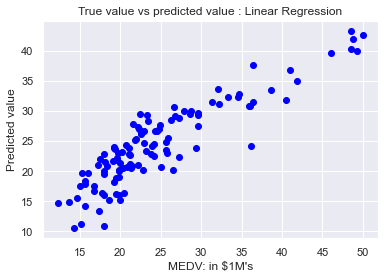

In [83]:
# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
py.scatter(y_test, y_pred, c = 'blue')
py.xlabel("MEDV: in $1M's")
py.ylabel("Predicted value")
py.title("True value vs predicted value : Linear Regression")
py.show()

In [84]:
# Results of Linear Regression.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error : ", mse)

Mean Square Error :  14.4356527232376


In [91]:
train.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'RIVER_FLG', 'No2', 'Rooms', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'prop_slums', 'LSTAT', 'MEDV'],
      dtype='object')

In [98]:
test.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'RIVER_FLG', 'nitric oxides concentration',
       '#rooms/dwelling', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO  ', 'B',
       'LSTAT'],
      dtype='object')

In [102]:
final_test=test.drop('ID',axis=1).rename({"nitric oxides concentration":"No2","#rooms/dwelling":"Rooms","PTRATIO  ":"PTRATIO","B":"prop_slums"},axis=1)

In [104]:
final_test.head(2)

,CRIM,ZN,INDUS,RIVER_FLG,No2,Rooms,AGE,DIS,RAD,TAX,PTRATIO,prop_slums,LSTAT
0,9.693915,0,18.824,0,0.63731,6.02952,100.0,1.204173,24,666,20.2,347.8425,10.0065
1,5.143131,0,18.462,0,0.63731,4.97000,100.0,1.305850,24,666,20.2,356.7440,3.0970


In [105]:
# predicting on actual  testing set  set results
y_pred2 = regressor.predict(final_test)

In [88]:
y_pred2

array([36.49050497, 21.75391468, 41.19804113, 35.35959621, 38.32464392,
       32.62412611, 23.71290136,  6.11974702, 21.00496999, 22.80203069,
       39.66624135, 20.21662249, 31.03219329, 30.11793821, 28.6050529 ,
       26.21875443, 29.83977595, 24.72767051, 26.53893044, 23.14878107,
       37.13023837, 26.88992448, 16.86898202, 24.33853426, 23.61678799,
       16.42977487, 21.4068018 , 51.67706622, 37.02318087, 28.1077411 ,
       15.08049451, 31.48391792, 32.44456854, 31.75972537, 30.90283847,
       28.94251355, 26.83948252, 14.68481115, 23.77436493, 21.53374503,
       12.83476175, 12.30217171, 31.28392824, 29.66240529, 27.83141407,
       23.39410048, 17.42675739, 43.56336615, 31.44277152, 15.58676427,
       12.05348039, 25.03064312, 27.6229939 , 28.17390892, 31.12204129,
       16.72540482, 38.2921395 , 28.89480423, 17.55864462, 24.96731087,
       18.94377549, 32.97159923, 30.47615152, 28.20591982, 35.27236724,
        9.91199128, 31.31322798, 30.89003942, 33.33944474, 26.91

In [129]:
#combining two data set 
ID=np.array(test['ID']).astype(int)

In [137]:
id= pd.DataFrame(ID,columns=['ID'])
id

,ID
0,400
1,401
2,402
3,403
4,404
...,...
97,497
98,498
99,499
100,500


In [115]:
MEDV_= np.array(y_pred2)

In [139]:
medv = pd.DataFrame(MEDV)
medv

,0
0,36.490505
1,21.753915
2,41.198041
3,35.359596
4,38.324644
...,...
97,32.915301
98,28.603830
99,5.990273
100,10.011449


In [132]:
MEDV.shape

(102,)

In [149]:
final_data = pd.concat([id, medv], axis = 1)
final_data.columns

Index(['ID', 0], dtype='object')

In [153]:
final_data.rename({'0':"MEDV"},axis=1,inplace=True)

In [154]:
final_data

,ID,0
0,400,36.490505
1,401,21.753915
2,402,41.198041
3,403,35.359596
4,404,38.324644
...,...,...
97,497,32.915301
98,498,28.603830
99,499,5.990273
100,500,10.011449


In [148]:
housing_csv_data = final_data.to_csv('koshal-housing.csv', index = False)